In [1094]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [1095]:
funds = pd.read_csv('startup_funding.csv',thousands=',')

In [1096]:
funds.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,NaN


## Feature Engerring 

In [1097]:
revised_funds = funds.drop('SNo',axis=1)

In [1098]:
revised_funds['funded_year'] = revised_funds.Date.str[-4:]

In [1099]:
revised_funds['funded_month'] = revised_funds.Date.str[-7:-5]

In [1100]:
revised_funds.head(1)

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks,funded_year,funded_month
0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,NaN,2017,08


#### Droping Date, Remark column for better analysis

In [1101]:
revised_funds = revised_funds.drop(['Date','Remarks'],axis=1)

In [1102]:
pd.to_numeric(revised_funds.funded_year).head()

0    2017
1    2017
2    2017
3    2017
4    2017
Name: funded_year, dtype: int64

In [1103]:
revised_funds.funded_month = revised_funds.funded_month.str.replace('/','0')

In [1104]:
pd.to_numeric(revised_funds.funded_month).head()

0    8
1    8
2    8
3    8
4    8
Name: funded_month, dtype: int64

In [1105]:
revised_funds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 9 columns):
StartupName         2372 non-null object
IndustryVertical    2201 non-null object
SubVertical         1436 non-null object
CityLocation        2193 non-null object
InvestorsName       2364 non-null object
InvestmentType      2371 non-null object
AmountInUSD         1525 non-null float64
funded_year         2372 non-null object
funded_month        2372 non-null object
dtypes: float64(1), object(8)
memory usage: 166.9+ KB


### Lets find if our data have missing values

In [1106]:
pd.isnull(revised_funds).sum()

StartupName           0
IndustryVertical    171
SubVertical         936
CityLocation        179
InvestorsName         8
InvestmentType        1
AmountInUSD         847
funded_year           0
funded_month          0
dtype: int64

#### As we can see our data have many missing values. Now there are lots of method / ways to handle missing values. Here I'm using interplation for continous column which is 'AmountInUSD'

In [1107]:
revised_funds.head()

,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,funded_year,funded_month
0,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1300000.0,2017,08
1,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,2017,08
2,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,2017,08
3,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,500000.0,2017,08
4,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,850000.0,2017,08


In [1108]:
revised_funds['AmountInUSD'].fillna(revised_funds['AmountInUSD'].mean(),inplace=True)

In [1109]:
revised_funds.head()

,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,funded_year,funded_month
0,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1.300000e+06,2017,08
1,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,1.203107e+07,2017,08
2,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,1.203107e+07,2017,08
3,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,5.000000e+05,2017,08
4,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,8.500000e+05,2017,08


In [1110]:
revised_funds['AmountInUSD'].mean()

12031073.099016525

In [1111]:
revised_funds = revised_funds.fillna({'IndustryVertical':'other',
                      'SubVertical':'other','CityLocation':'other',
                      'InvestorsName':'anonymous','InvestmentType':'other'})

In [1112]:
pd.isnull(revised_funds).sum()

StartupName         0
IndustryVertical    0
SubVertical         0
CityLocation        0
InvestorsName       0
InvestmentType      0
AmountInUSD         0
funded_year         0
funded_month        0
dtype: int64

In [1113]:
revised_funds.funded_month = revised_funds.funded_month.astype(int,inplace=True)
revised_funds.funded_year = revised_funds.funded_year.astype(int,inplace=True)

#### All missing values handled 

In [1114]:
revised_funds.head()

,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,funded_year,funded_month
0,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,1.300000e+06,2017,8
1,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,1.203107e+07,2017,8
2,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,1.203107e+07,2017,8
3,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,5.000000e+05,2017,8
4,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,8.500000e+05,2017,8


## Lets do some data visualization

### Year wise total funding

In [1115]:
sorted_funds = revised_funds.groupby('funded_year')['AmountInUSD'].sum().sort_values(ascending=False)
top30_funds = sorted_funds.head(30)
top30_df = top30_funds.to_frame()

Text(0.5, 1.0, 'Year wise funding ')

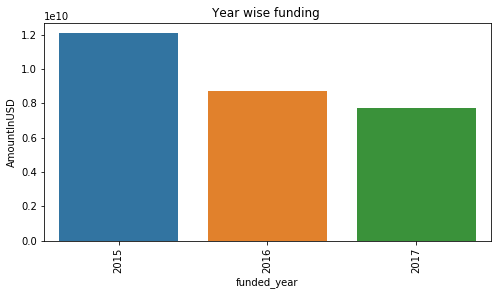

In [1116]:
plt.figure(figsize=(8,4))
sns.barplot(top30_df.index,top30_df.AmountInUSD)
plt.xticks(rotation=90)
plt.title("Year wise funding ")

### Top Investors

In [1117]:
investors = revised_funds['InvestorsName'].value_counts().sort_values(ascending=False)
top30_investors = investors.head(30)
top30_investors_df = top30_investors.to_frame()

Text(0.5, 1.0, 'Top Investors ')

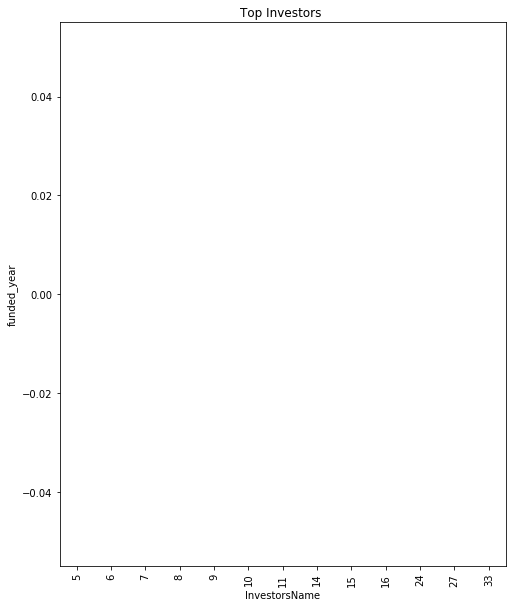

In [1118]:
plt.figure(figsize=(8,10))
sns.barplot(top30_investors_df.InvestorsName,top30_df.index)
plt.xticks(rotation=90)
plt.title("Top Investors ")

#### Lets find out compnies got highest funds (top 30)

In [1119]:
sorted_funds = revised_funds.groupby('StartupName')['AmountInUSD'].sum().sort_values(ascending=False)

In [1120]:
top30_funds = sorted_funds.head(30)

In [1121]:
top30_df = top30_funds.to_frame()

Text(0.5, 1.0, 'compnies got highest funds (top 30) ')

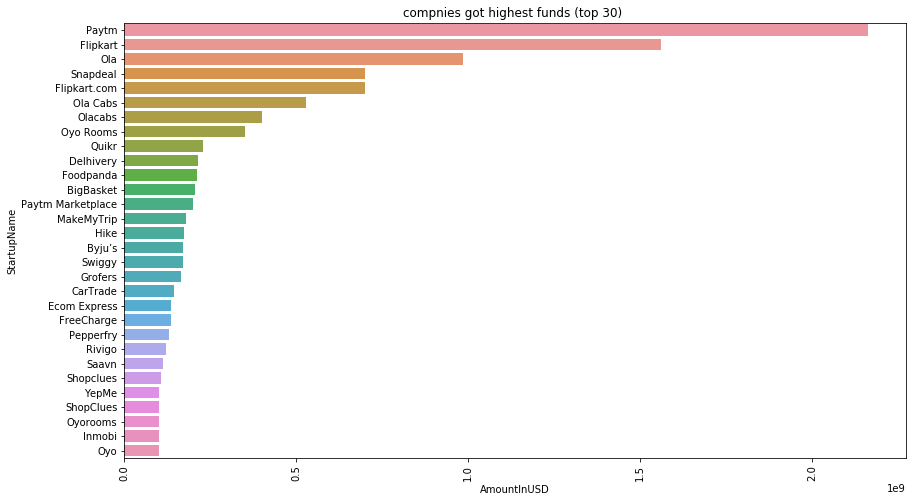

In [1122]:
plt.figure(figsize=(14,8))
sns.barplot(top30_df.AmountInUSD,top30_df.index)
plt.xticks(rotation=90)
plt.title("compnies got highest funds (top 30) ")

###  popluar domain verticals  in startup ecosystems

In [1123]:
indus_funds = revised_funds.groupby('IndustryVertical')['AmountInUSD'].sum().sort_values(ascending=False)

In [1124]:
indus30_funds= indus_funds.head(30)

In [1125]:
indus30_df = indus30_funds.to_frame()

Text(0.5, 1.0, 'Popular Domains')

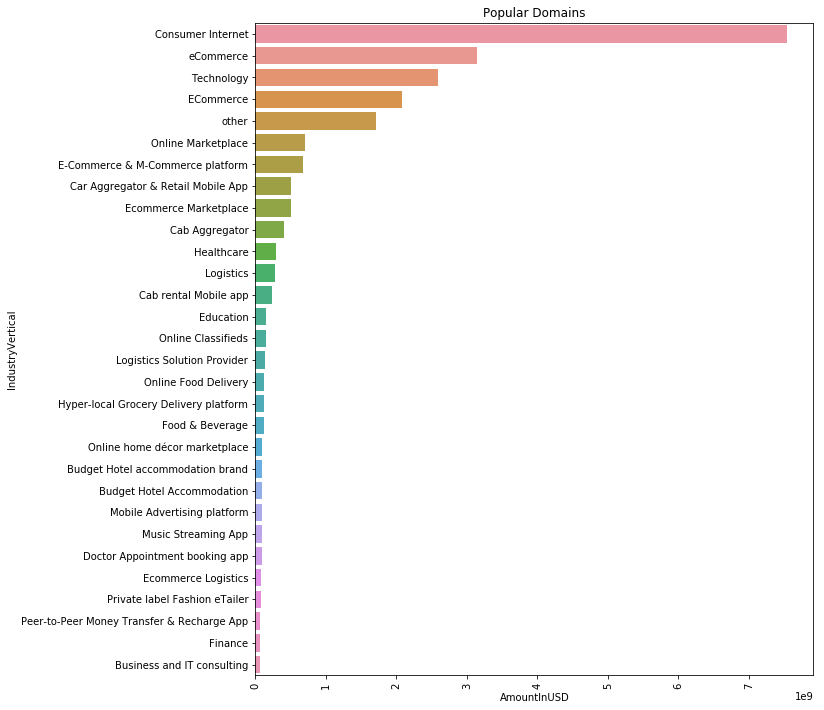

In [1126]:
plt.figure(figsize=(10,12))
sns.barplot(indus30_df.AmountInUSD,indus30_df.index)
plt.xticks(rotation=90)
plt.title("Popular Domains")

#### Which city has most startups

In [1127]:
city_location = revised_funds['CityLocation'].value_counts().sort_values(ascending=False)

In [1128]:
city_location_df = city_location.to_frame()

In [1129]:
top30_cities = city_location_df.head(30)

In [1130]:
top30_cities.columns

Index(['CityLocation'], dtype='object')

Text(0.5, 1.0, 'Cities with most startup')

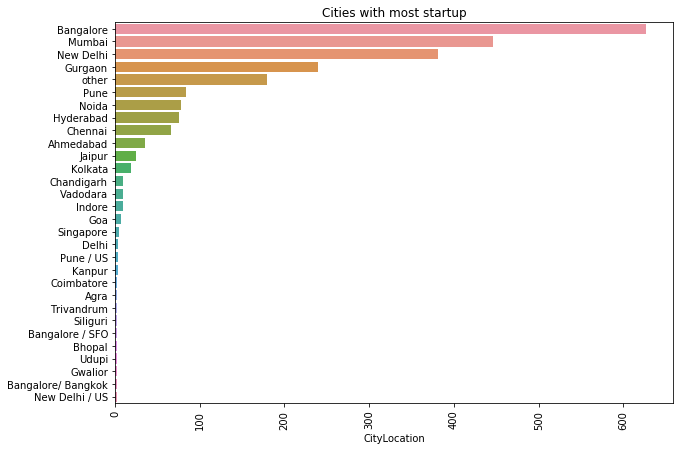

In [1131]:
plt.figure(figsize=(10,7))
sns.barplot(top30_cities.CityLocation,top30_cities.index)
plt.xticks(rotation=90)
plt.title("Cities with most startup")

#### Let create the model to predict the ecosystem. So as we can see our most features are categorical and to make it model compitable we need to convert it into continous data. We have many techniques to convert categorical data into continous e.g. One Hot Encoding, Label Encoding

In [1132]:
def one_hot_encode(df,columnName):
    top10 = df[columnName].value_counts().sort_values(ascending=False).head(10).index
    for label in top10:
        df[columnName+"_"+label] = np.where(df[columnName]==label,1,0)

In [1133]:
one_hot_encode(revised_funds,'StartupName')

In [1134]:
one_hot_encode(revised_funds,'IndustryVertical')

In [1135]:
#one_hot_encode(revised_funds,'InvestorsName')
one_hot_encode(revised_funds,'InvestmentType')

In [1136]:
one_hot_encode(revised_funds,'CityLocation')

In [1137]:
one_hot_encode(revised_funds,'SubVertical')

In [1138]:
onehot_df = revised_funds.drop(['StartupName', 'IndustryVertical', 'SubVertical', 'CityLocation',
       'InvestorsName', 'InvestmentType', 'AmountInUSD', 'funded_year',
       'funded_month'],axis=1)

In [1139]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [1140]:
X = onehot_df

In [1141]:
y= revised_funds['AmountInUSD']

In [1142]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [1143]:
X_test.shape, y_test.shape

((475, 48), (475,))

In [1144]:
lr = LinearRegression()

In [1145]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [1146]:
y_pred = lr.predict(X_test)

In [1147]:
from sklearn.metrics import mean_squared_error

In [1148]:
print('MSE :  ',mean_squared_error(y_test,y_pred))
print('RMSE :  ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Score : ', lr.score(X_test,y_test))
print('Intercept  : ',lr.intercept_)

MSE :   1.934958445668439e+38
RMSE :   1.3910278378481285e+19
Score :  -1.3284229974586913e+23
Intercept  :  -3.071862804555074e+20


In [1149]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
df.head(25)

,Actual,Predicted
1241,1.000000e+05,4849664.0
1034,1.203107e+07,15007744.0
58,1.203107e+07,16384000.0
1427,1.203107e+07,4849664.0
1859,1.203107e+07,18874368.0
1065,1.203107e+07,15794176.0
1996,5.000000e+05,5898240.0
2335,1.203107e+07,15532032.0
2077,1.203107e+07,7274496.0
79,1.230000e+07,16711680.0


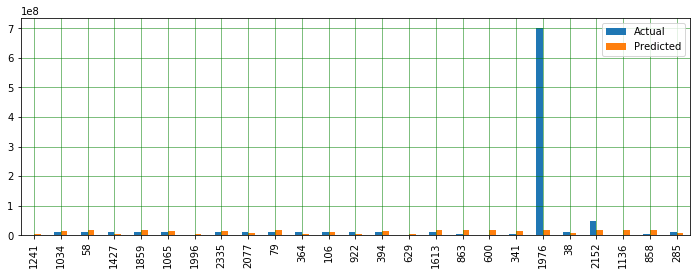

In [1150]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(12,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [1151]:
from sklearn.neighbors import KNeighborsRegressor

In [1152]:
knn = KNeighborsRegressor(n_neighbors=5)

In [1153]:
knn.fit(X_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform')

In [1154]:
ky_pred = knn.predict(X_test)

In [1155]:
print('MSE :  ',mean_squared_error(y_test,ky_pred))
print('RMSE :  ',np.sqrt(mean_squared_error(y_test,ky_pred)))
print('Score : ', knn.score(X_test,y_test))

MSE :   1561162088956619.5
RMSE :   39511543.74302046
Score :  -0.07179749848022876


In [1156]:
from sklearn.tree import DecisionTreeRegressor

In [1157]:
dtr = DecisionTreeRegressor()

In [1158]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [1159]:
dtr_pred = dtr.predict(X_test)

In [1160]:
print('MSE :  ',mean_squared_error(y_test,dtr_pred))
print('RMSE :  ',np.sqrt(mean_squared_error(y_test,dtr_pred)))
print('Score : ', dtr.score(X_test,y_test))

MSE :   3302608636663526.5
RMSE :   57468327.24782866
Score :  -1.2673671749234532


In [1161]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': dtr_pred.flatten()})
df.head(25)

,Actual,Predicted
1241,1.000000e+05,6.647501e+06
1034,1.203107e+07,1.373308e+07
58,1.203107e+07,2.475191e+07
1427,1.203107e+07,6.647501e+06
1859,1.203107e+07,2.807605e+07
1065,1.203107e+07,1.500000e+07
1996,5.000000e+05,5.139705e+06
2335,1.203107e+07,1.745949e+07
2077,1.203107e+07,5.677609e+06
79,1.230000e+07,2.067009e+07


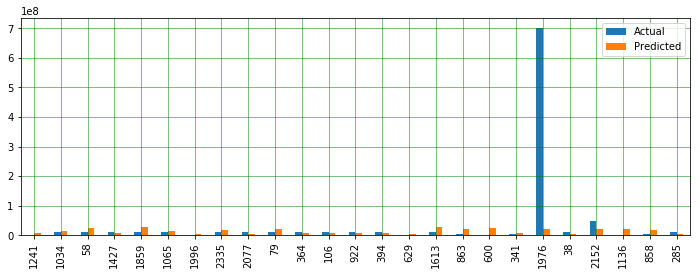

In [1162]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(12,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [1163]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import xgboost as xgb

In [1164]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear')

In [1165]:
xg_reg.fit(X_train,y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning:

Series.base is deprecated and will be removed in a future version



[02:39:35] WARNING: /usr/local/miniconda/conda-bld/xgboost_1566327371504/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [1166]:
xg_preds = xg_reg.predict(X_test)

In [1167]:
print('MSE :  ',mean_squared_error(y_test,xg_preds))
print('RMSE :  ',np.sqrt(mean_squared_error(y_test,xg_preds)))
print('Score : ', xg_reg.score(X_test,y_test))

MSE :   3269585881444607.5
RMSE :   57180292.77158877
Score :  -1.2446957901345632


In [1168]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': xg_preds.flatten()})
df.head(25)

,Actual,Predicted
1241,1.000000e+05,5422320.0
1034,1.203107e+07,14617058.0
58,1.203107e+07,17187704.0
1427,1.203107e+07,5422320.0
1859,1.203107e+07,19588572.0
1065,1.203107e+07,16667456.0
1996,5.000000e+05,5568011.5
2335,1.203107e+07,15463022.0
2077,1.203107e+07,7671112.5
79,1.230000e+07,16855850.0


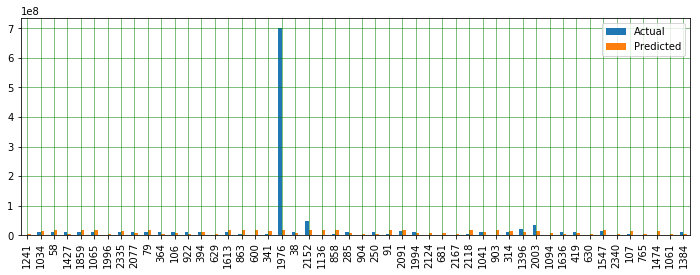

In [1169]:
df1 = df.head(50)
df1.plot(kind='bar',figsize=(12,4))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()